## DBSCAN Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
class DBSCAN(object):
    UN_CLASSIFIED = 0
    NOISE = -1

    UN_VISITED = 0
    VISITED = 1

    def __init__(self, eps, min_pts):
        self.eps = eps
        self.minPts = min_pts
        self.n_cluster = 1

    def fit(self, X):
        self._train(X)

    def _train(self, X):
        n = X.shape[0]
        self.labels_ = np.array([DBSCAN.UN_CLASSIFIED] * n)
        visited = DBSCAN.UN_VISITED * np.ones(n)

        left_classified, = np.where(visited == DBSCAN.UN_VISITED)
        while len(left_classified) != 0:
            x_idx = left_classified[0]

            visited[x_idx] = DBSCAN.VISITED # mark visited
            start_point = X[x_idx, :]
            n_neighbors, pts = self.get_neighbors(X, start_point)

            if n_neighbors < self.minPts:
                self.labels_[x_idx] = DBSCAN.NOISE
            else:
                self.labels_[x_idx] = self.n_cluster
                while len(pts) != 0:
                    neighor_id = pts[0]
                    pts = np.delete(pts, np.where(pts == neighor_id))
                    if visited[neighor_id] == DBSCAN.UN_VISITED:
                        visited[neighor_id] = DBSCAN.VISITED # mark visited
                        n_new_neighors, new_pts = self.get_neighbors(X, X[neighor_id])

                        if n_new_neighors >= self.minPts:
                            pts = np.concatenate((pts, new_pts), axis=None)

                    if self.labels_[neighor_id] == DBSCAN.UN_CLASSIFIED:
                        self.labels_[neighor_id] = self.n_cluster

                self.n_cluster += 1

            left_classified, = np.where(visited == DBSCAN.UN_VISITED)

    def get_neighbors(self, X, pt):
        dist = np.linalg.norm(X - pt, 2, axis=1)
        neighors = np.argsort(dist)
        count, = np.where(dist <= self.eps)
        return len(count), neighors[:len(count)]
    
    @staticmethod
    def k_nearest_neighbour(X, pt, k):
        dist = np.linalg.norm(X - pt, 2, axis=1)
        print (dist)
        neighors = np.argsort(dist)
        k_dist = dist[neighors[k]]
        return k_dist

    @classmethod
    def plot_param_est_curve(cls, data, k_nn):
        y = sorted([DBSCAN.k_nearest_neighbour(data, pt, k_nn) for pt in data])
        # plot
        plt.plot([id_ for id_ in range(len(data))], y, marker='o')
        plt.rcParams["figure.figsize"] = [8,8]
        plt.xlabel('Points sorted according to k={} nearest neighour'.format(k_nn))
        plt.ylabel('k={} Nearest Distance'.format(k_nn))
            

In [66]:
obj = DBSCAN(eps=3, min_pts=2)
X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]])
obj.fit(X)
print(obj.labels_)

[ 1  1  1  2  2 -1]


[ 0.          1.          1.41421356  8.60232527  9.21954446 81.60882305]
[ 1.          0.          1.          7.81024968  8.48528137 81.32035416]
[ 1.41421356  1.          0.          7.21110255  7.81024968 80.36168241]
[ 8.60232527  7.81024968  7.21110255  0.          1.         74.95331881]
[ 9.21954446  8.48528137  7.81024968  1.          0.         73.97972695]
[81.60882305 81.32035416 80.36168241 74.95331881 73.97972695  0.        ]


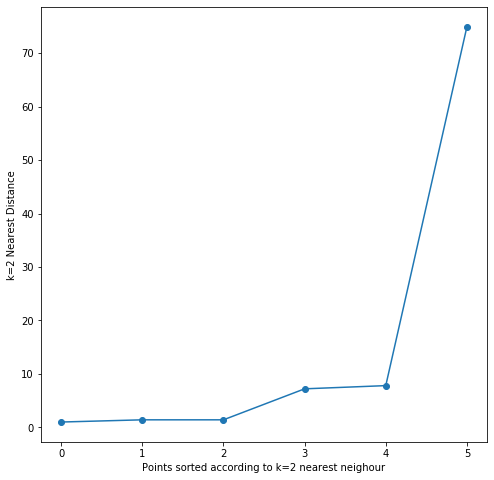

In [68]:
DBSCAN.plot_param_est_curve(X, 2)